<a href="https://colab.research.google.com/github/RizkyPutraKurniawan24/Machine-Learning/blob/master/Supervised%20Learning/Classification/Decision%20Tree%20with%20Gini%20Criterion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DECISION TREE**

Dalam bab ini kami akan menunjukkan cara membuat "Decision Tree". Decision Tree adalah Flow Chart, dan dapat membantu Anda mengambil keputusan berdasarkan pengalaman sebelumnya.

Dalam contoh ini, seseorang akan mencoba memutuskan apakah dia harus pergi ke acara komedi atau tidak.

Untungnya orang contoh kita telah mendaftar setiap kali ada pertunjukan komedi di kota tersebut, dan mendaftarkan beberapa informasi tentang komedian tersebut, dan juga mendaftar apakah dia hadir atau tidak.

Sekarang, berdasarkan dataset ini, Python dapat membuat decision tree yang dapat digunakan untuk memutuskan apakah ada acara baru yang layak untuk disaksikan.

## **How Does It Works ?**

Pertama, read dataset dengan pandas

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('drive/MyDrive/All Datasets/[Machine Learning Algorithm]/Dataset Machine Learning (Classification)/Decision Tree/comedian_show.csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Age,Experience,Rank,Nationality,Go
0,36,10,9,UK,NO
1,42,12,4,USA,NO
2,23,4,6,N,NO
3,52,4,4,USA,NO
4,44,14,5,UK,NO


Untuk membuat decision tree, semua data harus berupa numerical data.

Kita harus mengubah kolom non-numerical 'Nationality' dan 'Go' menjadi numerical data.

Pandas memiliki metode $map()$ yang menggunakan kamus berisi informasi tentang cara mengonversi nilai.

$${'UK': 0, 'USA': 1, 'N': 2}$$

$${'YES': 1, 'NO': 0}$$

Artinya , meng-convert nilai 'UK' menjadi 0 , 'USA' menjadi 1 dan 'N' menjadi 2

Dan , meng-convert nilai 'YES' menjadi 1 dan 'NO' menjadi 0

In [ ]:
d = {'UK': 0, 'USA': 1, 'N': 2}
df['Nationality'] = df['Nationality'].map(d)
d = {'YES': 1, 'NO': 0}
df['Go'] = df['Go'].map(d)

print(df)

    Age  Experience  Rank  Nationality  Go
0    36          10     9            0   0
1    42          12     4            1   0
2    23           4     6            2   0
3    52           4     4            1   0
4    44          14     5            0   0
5    66           3     7            2   1
6    35          14     9            0   1
7    52          13     7            2   1
8    35           5     9            2   1
9    24           3     5            1   0
10   18           3     7            0   1
11   45           9     9            0   1
12   43          21     8            1   1


Kemudian kita harus memisahkan *Feature columns* dari *Target Columns*.

*Feature columns* adalah kolom yang kita coba prediksi, dan *Target Columns* adalah kolom dengan nilai yang kita coba prediksi.

In [ ]:
features = ['Age', 'Experience', 'Rank', 'Nationality']
target = ['Go']

X = df[features] # X adalah feature columns
y = df[target] # y adalah target column

print(X)
print()
print(y)

    Age  Experience  Rank  Nationality
0    36          10     9            0
1    42          12     4            1
2    23           4     6            2
3    52           4     4            1
4    44          14     5            0
5    66           3     7            2
6    35          14     9            0
7    52          13     7            2
8    35           5     9            2
9    24           3     5            1
10   18           3     7            0
11   45           9     9            0
12   43          21     8            1

    Go
0    0
1    0
2    0
3    0
4    0
5    1
6    1
7    1
8    1
9    0
10   1
11   1
12   1


Sekarang kita dapat membuat decision tree sebenarnya, menyesuaikannya dengan detail kita. Mulailah dengan mengimpor modul yang kita butuhkan:

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

Ada banyak untuk membagi sample, kami menggunakan metode GINI dalam tutorial ini.

Metode GINI menggunakan rumus berikut:

$$Gini = 1 - (x/n)^2 - (y/n)^2$$

Dimana $n$ adalah jumlah sampel, $x$ adalah jumlah jawaban positif (“GO”) dan $y$ adalah jumlah jawaban negatif (“NO”).

[Text(0.3333333333333333, 0.875, 'Rank <= 6.5\ngini = 0.497\nsamples = 13\nvalue = [6, 7]'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.5, 0.625, 'Experience <= 9.5\ngini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.6666666666666666, 0.375, 'Experience <= 11.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8333333333333334, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]')]

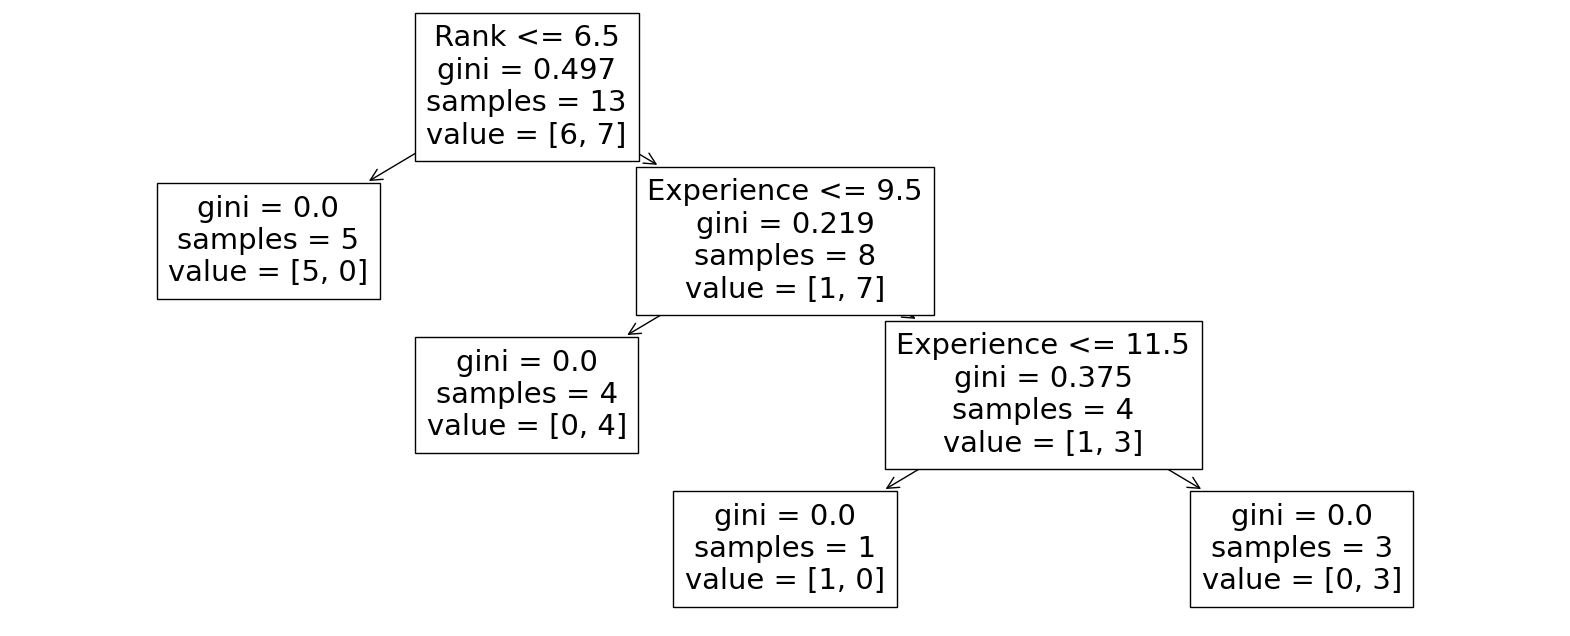

In [ ]:
dtree = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
dtree = dtree.fit(X, y)
plt.figure(figsize=(20,8))
tree.plot_tree(dtree, feature_names=features)

## **Result Explained**

### $$Gini = 1 - (6 / 13)2 - (7 / 13)2 = 0.497$$

$Rank <= 6.5$ berarti setiap komedian dengan rank 6.5 atau lebih rendah akan mengikuti panah $True$ (ke kiri), dan sisanya akan mengikuti panah $False$ (ke kanan).

$gini$ = 0.497 mengacu pada quality of the split, dan selalu berupa angka antara 0.0 sampai 0.5, dimana 0.0 berarti semua sampel mendapat hasil yang sama, dan 0.5 berarti splitting dilakukan tepat di tengah-tengah.

$samples$ = 13 berarti masih ada 13 komedian yang tersisa saat ini dalam pengambilan keputusan, semuanya karena ini adalah langkah pertama.

$value$ = [6, 7] artinya dari 13 komedian ini, 6 orang mendapat nilai "NO", dan 7 orang mendapat nilai "GO".

### **True - 5 Comedians End Here**

$gini = 0.0$ berarti semua sampel mendapat hasil yang sama.

$sampel = 5$ berarti masih ada 5 komedian tersisa di cabang ini.

$value = [5, 0]$ artinya 5 mendapat “NO” dan 0 mendapat “GO”.

### $$Gini = 1 - (1 / 8)^2 - (7 / 8)^2 = 0.219$$


### **False - 8 Comedians Continue:**

$Experience <= 9.5$ berarti komedian dengan nilai experience kurang dari sama dengan 9.5 akan mengikuti panah ke kiri, dan sisanya akan mengikuti panah ke kanan.

$gini = 0.219$ berarti sekitar 25% sampel akan mengarah ke satu arah.

$sampel = 8$ berarti tersisa 8 komedian di cabang ini (8 komedian dengan Peringkat lebih tinggi dari 6,5).

$value = [1, 7]$ artinya dari 8 komedian ini, 1 akan mendapat nilai "NO" dan 7 akan mendapat "GO".

### **True - 4 Comedians End Here**

$gini = 0.0$ berarti semua sampel mendapat hasil yang sama.

$sampel = 1$ berarti masih ada 1 komedian tersisa di cabang ini.

$value = [0, 4]$ artinya 0 mendapat “NO” dan 4 mendapat “GO”.

### $$Gini = 1 - (1 / 4)^2 - (3 / 4)^2 = 0.375$$

### **False - 4 Comedians Continue:**
$Experience <= 11.5$ berarti komedian dengan nilai experience kurang dari sama dengan 11.5 akan mengikuti panah ke kiri, dan sisanya akan mengikuti panah ke kanan.

$gini = 0.0$ berarti semua sample mendapat hasil yang sama.

$sampel = 2$ berarti tersisa 2 komedian di cabang ini.

$value = [1, 3]$ artinya dari 4 komedian ini, 1 akan mendapat nilai "NO" dan 3 akan mendapat "GO".

### **True - 1 Comedians End Here**

$gini = 0.0$ berarti semua sampel mendapat hasil yang sama.

$sampel = 1$ berarti masih ada 1 komedian tersisa di cabang ini.

$value = [1, 0]$ artinya 1 mendapat “NO” dan 0 mendapat “GO”.

### $$Gini = 1 - (0 / 3)^2 - (3 / 3)^2 = 0$$

### **False - 4 Comedians Continue:**

$gini = 0.0$ berarti semua sample mendapat hasil yang sama.

$sampel = 3$ berarti tersisa 3 komedian di cabang ini.

$value = [0, 3]$ artinya dari 3 komedian ini, 0 akan mendapat nilai "NO" dan 3 akan mendapat "GO".




## **Predict Values**

Kita bisa menggunakan Decision Tree untuk predict new values

Contoh : Haruskah saya menonton pertunjukan yang dibintangi oleh komedian Amerika berusia 40 tahun, dengan pengalaman 10 tahun, dan peringkat komedi 7?

In [ ]:
predict_new_values = dtree.predict([[40, 10, 7, 1]])
print(f'Jika [0] maka NO , jika [1] maka GO : Predict New Value = {predict_new_values}')

Jika [0] maka NO , jika [1] maka GO : Predict New Value = [1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Bagaimana jika pengalaman 12 tahun ?

In [ ]:
predict_new_values = dtree.predict([[40, 12, 7, 1]])
print(f'Jika [0] maka NO , jika [1] maka GO : Predict New Value = {predict_new_values}')

Jika [0] maka NO , jika [1] maka GO : Predict New Value = [1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
df

,Age,Experience,Rank,Nationality,Go
0,36,10,9,0,0
1,42,12,4,1,0
2,23,4,6,2,0
3,52,4,4,1,0
4,44,14,5,0,0
5,66,3,7,2,1
6,35,14,9,0,1
7,52,13,7,2,1
8,35,5,9,2,1
9,24,3,5,1,0


Hasil Berbeda

Anda akan melihat bahwa Decision Tree memberikan hasil yang berbeda jika Anda menjalankannya cukup sering, meskipun Anda memberinya data yang sama.

Hal ini karena Decision Tree tidak memberikan kita jawaban pasti 100%. Hal ini didasarkan pada kemungkinan suatu hasil, dan jawabannya akan bervariasi.